# Importacion de librerias

In [2]:
from wget import download
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Descarga de datos

In [3]:
datos_arbolado= pd.read_csv("../data/arbolado-publico-lineal-2017-2018.csv")

/tmp/ipykernel_25245/175755440.py:1: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_arbolado= pd.read_csv("../data/arbolado-publico-lineal-2017-2018.csv")


# Apertura de datos

In [4]:
datos_arbolado.head()

long        lat nro_registro tipo_activ  comuna manzana  \
0 -58.378563 -34.594902        26779     Lineal       1     NaN   
1 -58.381532 -34.592319        30887     Lineal       1     NaN   
2 -58.379103 -34.591939        30904     Lineal       1     NaN   
3 -58.380710 -34.591548        31336     Lineal       1     NaN   
4 -58.380710 -34.591548        31337     Lineal       1     NaN   

        calle_nombre calle_altura calle_chapa    direccion_normalizada  \
0          Esmeralda       1000.0      1120.0           ESMERALDA 1120   
1  Pellegrini Carlos       1300.0      1345.0  PELLEGRINI, CARLOS 1345   
2             Arroyo        800.0       848.0               ARROYO 848   
3             Arroyo        900.0       932.0               ARROYO 932   
4             Arroyo        900.0       932.0               ARROYO 932   

  ubicacion       nombre_cientifico ancho_acera estado_plantera  \
0       NaN            Tipuana tipu         5.5         Ocupada   
1    Exacta      Peltophorum dubium         4.5         Ocupada   
2    Exacta  Fraxinus pennsylvanica           4         Ocupada   
3        LD  Fraxinus pennsylvanica         NaN         Ocupada   
4        LA   Jacaranda mimosifolia         NaN         Ocupada   

  ubicacion_plantera nivel_plantera  diametro_altura_pecho  altura_arbol  
0            Regular        A nivel                   88.0          34.0  
1            Regular        Elevada                    6.0           5.0  
2            Regular        A nivel                    7.0           6.0  
3            Regular        A nivel                    9.0          29.0  
4            Regular        A nivel                   13.0           8.0

In [5]:
datos_arbolado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370180 entries, 0 to 370179
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   long                   354838 non-null  float64
 1   lat                    354838 non-null  float64
 2   nro_registro           370180 non-null  object 
 3   tipo_activ             370180 non-null  object 
 4   comuna                 370180 non-null  int64  
 5   manzana                224140 non-null  object 
 6   calle_nombre           370087 non-null  object 
 7   calle_altura           364677 non-null  object 
 8   calle_chapa            363721 non-null  object 
 9   direccion_normalizada  355941 non-null  object 
 10  ubicacion              361884 non-null  object 
 11  nombre_cientifico      370180 non-null  object 
 12  ancho_acera            367083 non-null  object 
 13  estado_plantera        370180 non-null  object 
 14  ubicacion_plantera     368776 non-nu

In [6]:
datos_arbolado.describe()

long            lat         comuna  diametro_altura_pecho  \
count  354838.000000  354838.000000  370180.000000          369894.000000   
mean      -58.458791     -34.612473       9.143735              31.986864   
std         0.041514       0.033695       3.876242              21.267623   
min       -58.530458     -34.697333       1.000000               0.000000   
25%       -58.491269     -34.637834       6.000000              17.000000   
50%       -58.465865     -34.615023      10.000000              29.000000   
75%       -58.428583     -34.586580      12.000000              43.000000   
max       -58.354003     -34.535972      15.000000             199.000000   

        altura_arbol  
count  365858.000000  
mean        9.036132  
std         4.894625  
min         1.000000  
25%         6.000000  
50%         8.000000  
75%        12.000000  
max        40.000000

# Visualizacion de datos crudos

## Latitud y longitud expresadas en forma de mapa


### Imprimir scatter que representa el mapa de la ciudad en relacion a los arboles


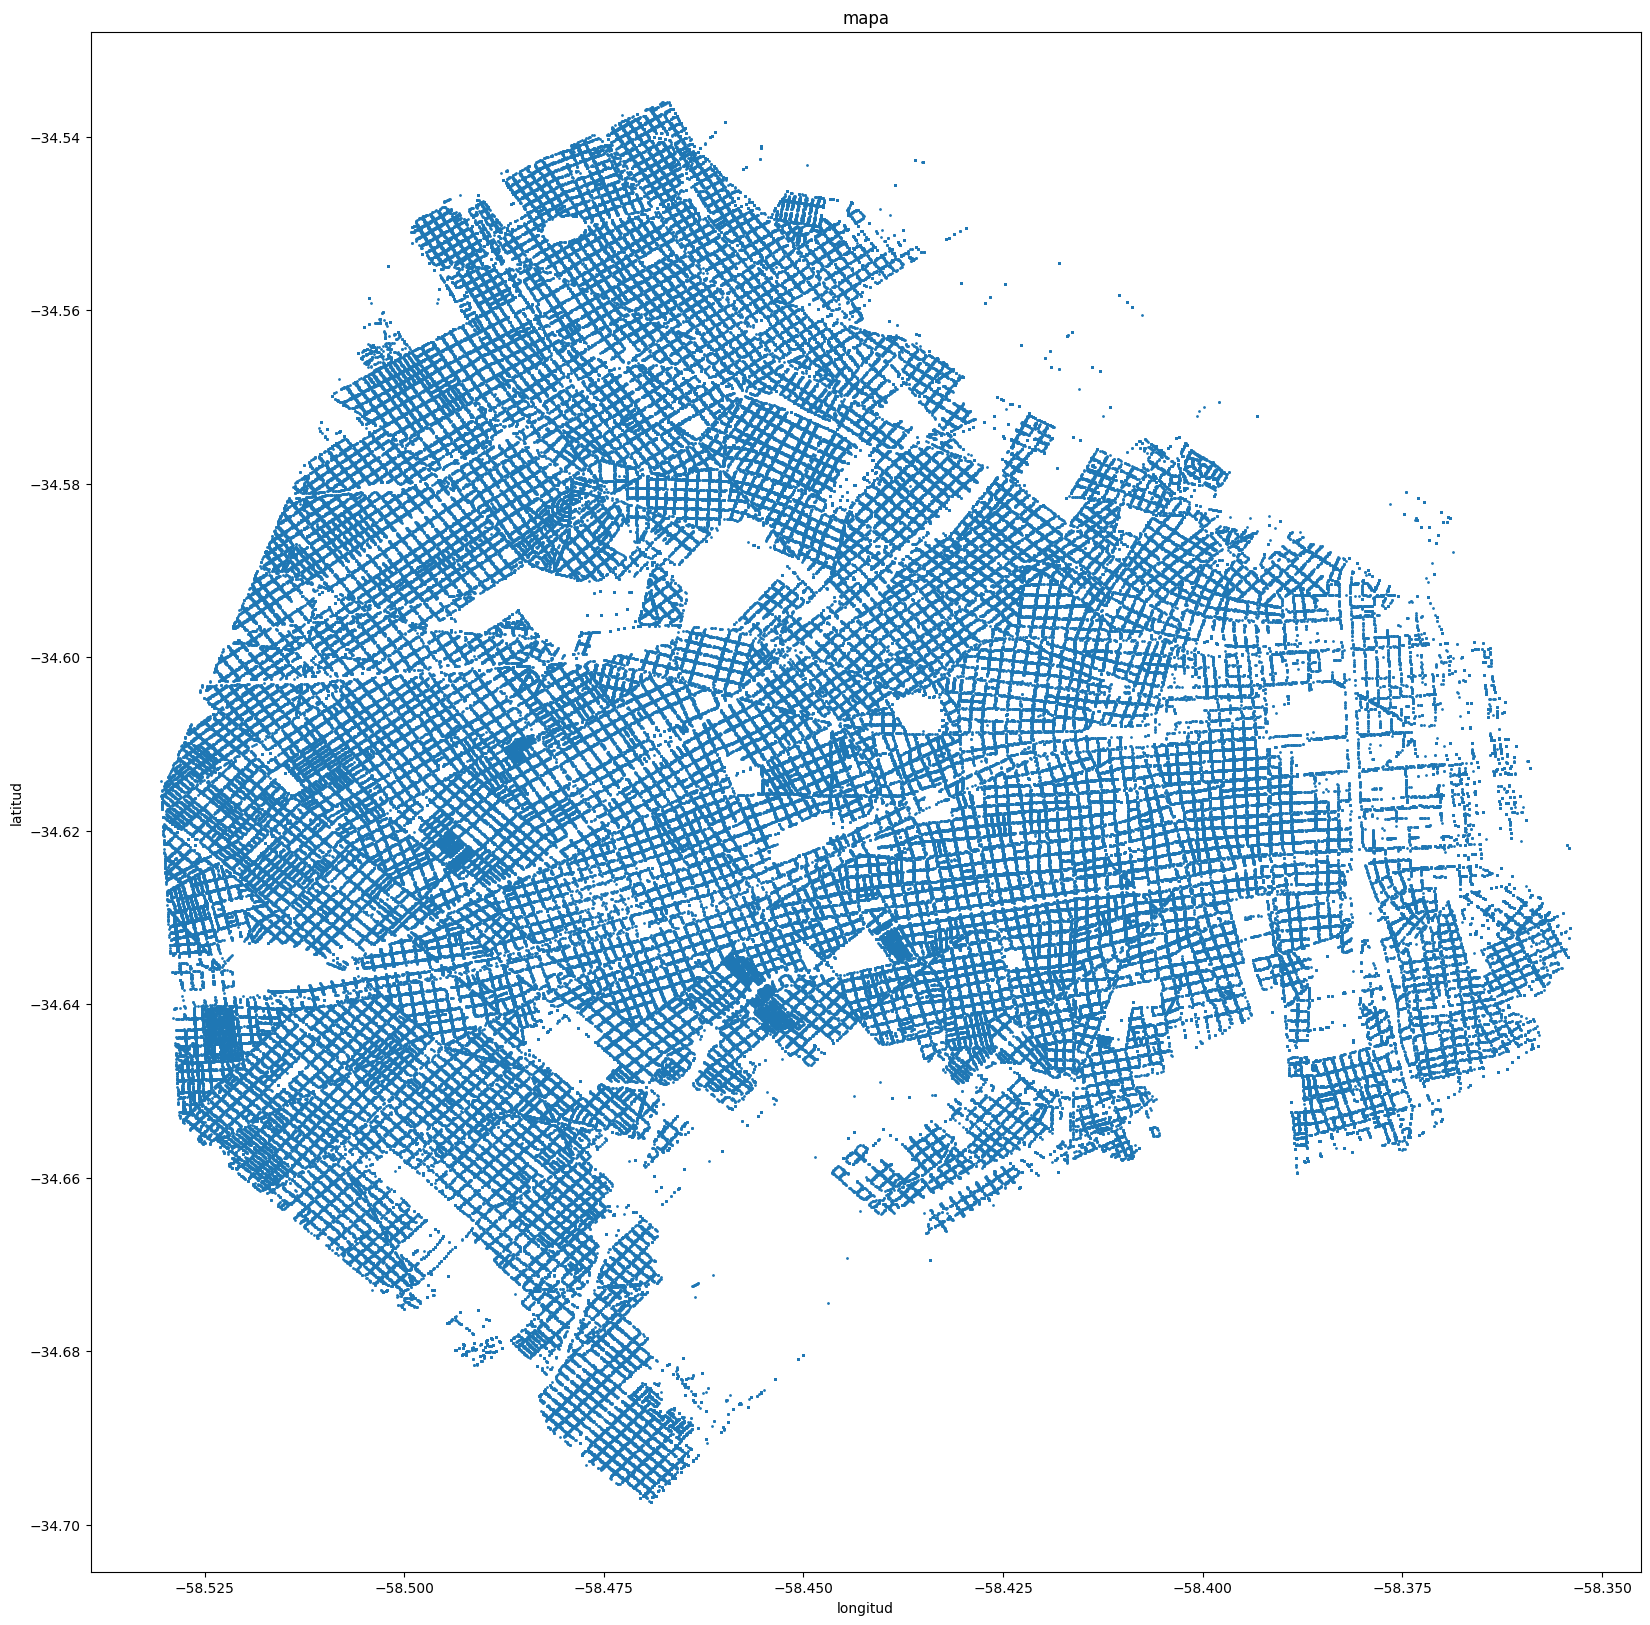

In [7]:
plt.figure(figsize=(20,20))
plt.scatter(datos_arbolado['long'], datos_arbolado['lat'], s=1)
plt.xlabel("longitud")
plt.ylabel("latitud")
plt.title("mapa")

plt.show()

## nro_registro
Representa un identificador unico para cada arbol

In [8]:
datos_arbolado['nro_registro']

0          26779
1          30887
2          30904
3          31336
4          31337
           ...  
370175    546140
370176    546141
370177    546142
370178    546143
370179    546144
Name: nro_registro, Length: 370180, dtype: object

## tipo_actividad

### ¿Que representa el tipo de actividad?
analizar la variable, viendo que tipos de actividad hay y que significa cada una

In [9]:
datos_arbolado['tipo_activ'].value_counts()


tipo_activ
Lineal      365629
Lineal        4301
lineal         167
Lineal          35
calle           33
LINEAL          15
Name: count, dtype: int64

Los tipos de actividad representan el tipo de relevamiento o censo que el arbol forma parte del arbolado publico lineal.
Los tipos son lineal y de calle. que representan lo mismo. por lo tanto el conjunto de datos representa arboles de alumbrado publico, es decir de la vereda.


## Comunas


### Como se diferencian las comunas?

In [10]:
datos_arbolado['comuna'].value_counts()

comuna
12    38818
11    37340
9     36405
10    33421
4     32346
15    29587
13    28287
7     25608
14    22417
8     21978
6     15591
5     15224
3     13320
1     12723
2      7115
Name: count, dtype: int64

/tmp/ipykernel_25245/3762084320.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab20', len(categorias))


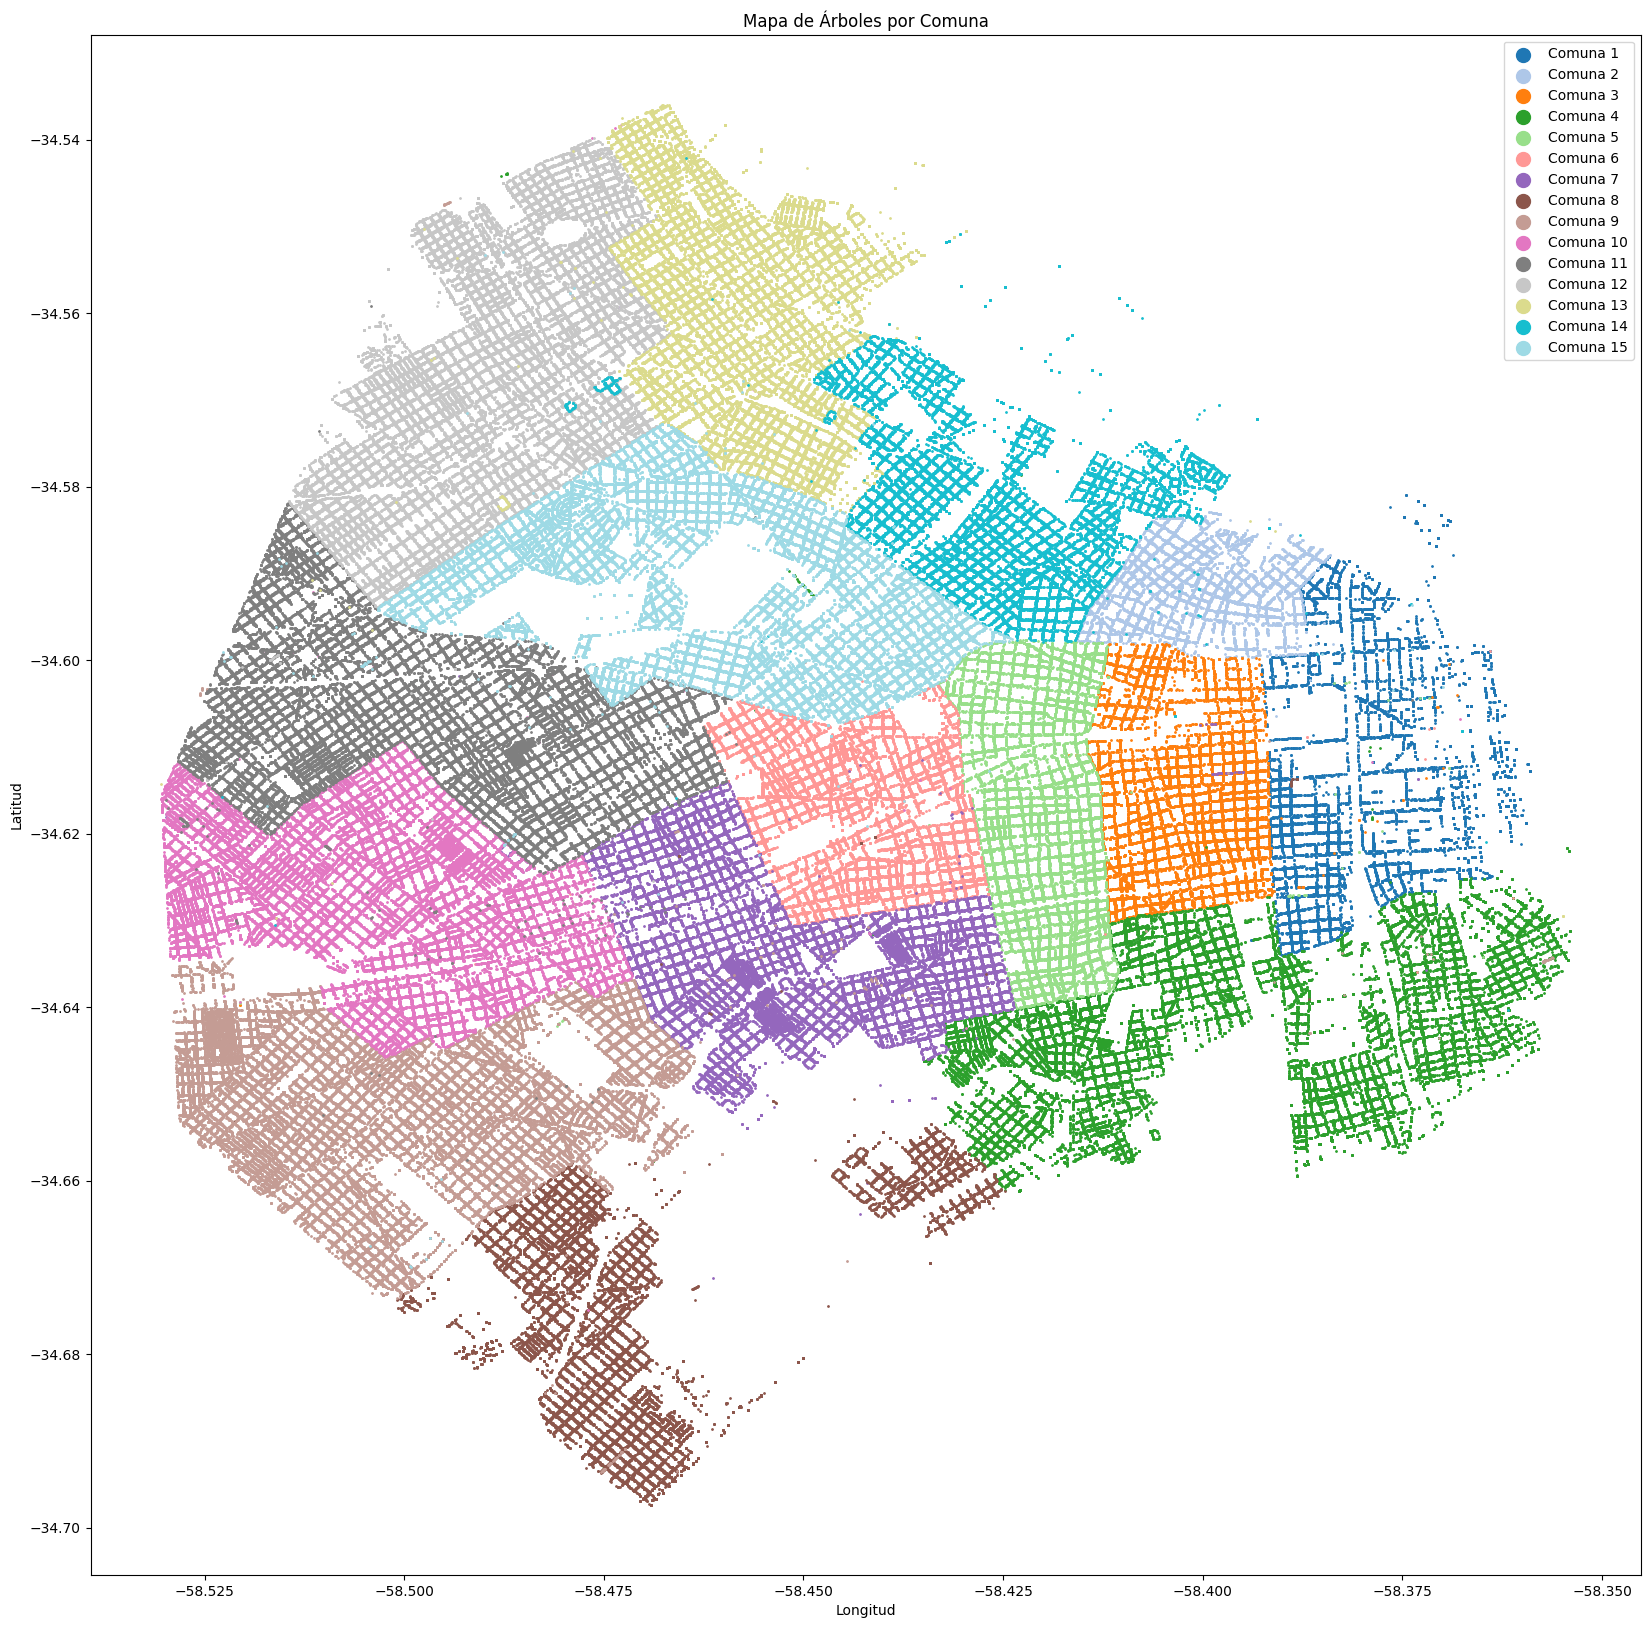

In [11]:
plt.figure(figsize=(20, 20))
categorias = sorted(datos_arbolado['comuna'].unique())
colores = plt.cm.get_cmap('tab20', len(categorias))

for i, comuna in enumerate(categorias):
    subset = datos_arbolado[datos_arbolado['comuna'] == comuna]
    plt.scatter(
        subset['long'],
        subset['lat'],
        s=1,
        color=colores(i),
        label=f'Comuna {int(comuna)}'
    )

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mapa de Árboles por Comuna")
plt.legend(markerscale=10)
plt.show()

## Manzanas

### Como se diferencia las manzanas?

In [12]:
datos_arbolado['manzana'].value_counts()

manzana
568      1102
16        462
948       455
467       421
874       412
         ... 
566 c       1
47p         1
980 i       1
23y         1
126 b       1
Name: count, Length: 1843, dtype: int64

## Calle_nombre

In [13]:
datos_arbolado['calle_nombre'].value_counts()

calle_nombre
Del Libertador, Av           1267
Alberdi Juan Bautista Av.    1153
Directorio Av.               1138
Rivadavia, Av                1133
Yerbal                       1128
                             ... 
Pérez                           1
Paracas                         1
Fenando de Montalvo             1
Jofre                           1
Dorrego                         1
Name: count, Length: 2334, dtype: int64

## calle_altura

In [14]:
datos_arbolado['calle_altura'].value_counts()

calle_altura
1400.0        5483
1200.0        5275
1500.0        5225
1100.0        5180
1300.0        5148
              ... 
39001717.0       1
30000.0          1
2241.0           1
2215.0           1
410011.0         1
Name: count, Length: 1828, dtype: int64

## Direccion_normalizada


In [15]:
datos_arbolado['direccion_normalizada'].value_counts()

direccion_normalizada
ESPAÑA AV.                                351
OBLIGADO RAFAEL, AV.COSTANERA             307
DORREGO AV.                               255
ALSINA, VALENTIN AV.                      216
DEL LIBERTADOR AV.                        185
                                         ... 
GARCIA DE COSSIO 6044                       1
CASTRO, EMILIO AV. 7615                     1
PIERES 404                                  1
PALMAR 6689                                 1
GARCIA GRANDE DE ZEQUEIRA, SEVERO 5589      1
Name: count, Length: 248939, dtype: int64

## Ubicacion

In [16]:
datos_arbolado['ubicacion'].value_counts()

ubicacion
Exacta    242660
LA         56069
LD         47636
LA1         2464
LD1         2107
           ...  
LA127          1
l2             1
l1             1
L6             1
L4             1
Name: count, Length: 544, dtype: int64

## Nombre_cientifico

In [17]:

dic= datos_arbolado['nombre_cientifico'].value_counts()>10000
print(dic)
nombres_cientificos= datos_arbolado[datos_arbolado['nombre_cientifico'].map(dic)]
nombres_cientificos






nombre_cientifico
Fraxinus pennsylvanica     True
Platanus x acerifolia      True
Ficus benjamina            True
Tilia x moltkei            True
Melia azedarach            True
                          ...  
Prunus serrulata          False
Synadenium grantii        False
Sterculia monosperma      False
Ficus microcarpa          False
Maclura pomifera          False
Name: count, Length: 431, dtype: bool


long        lat nro_registro tipo_activ  comuna manzana  \
2      -58.379103 -34.591939        30904     Lineal       1     NaN   
3      -58.380710 -34.591548        31336     Lineal       1     NaN   
4      -58.380710 -34.591548        31337     Lineal       1     NaN   
5      -58.381043 -34.591584        31344     Lineal       1     NaN   
6      -58.380968 -34.591576        31346     Lineal       1     NaN   
...           ...        ...          ...        ...     ...     ...   
370167        NaN        NaN       545933     Lineal      15     423   
370168        NaN        NaN       545934     Lineal      15     423   
370173        NaN        NaN       546137    Lineal       15     919   
370174        NaN        NaN       546139    Lineal       15     919   
370176        NaN        NaN       546141    Lineal       15     919   

                     calle_nombre calle_altura calle_chapa  \
2                          Arroyo        800.0       848.0   
3                          Arroyo        900.0       932.0   
4                          Arroyo        900.0       932.0   
5                          Arroyo        900.0       970.0   
6                          Arroyo        900.0       962.0   
...                           ...          ...         ...   
370167  De los Constituyentes Av.       2600.0      2600.0   
370168  De los Constituyentes Av.       2600.0      2600.0   
370173                    Guevara       1000.0      1000.0   
370174                    Guevara       1000.0      1000.0   
370176                    Guevara       1000.0      1000.0   

       direccion_normalizada ubicacion       nombre_cientifico ancho_acera  \
2                 ARROYO 848    Exacta  Fraxinus pennsylvanica           4   
3                 ARROYO 932        LD  Fraxinus pennsylvanica         NaN   
4                 ARROYO 932        LA   Jacaranda mimosifolia         NaN   
5                 ARROYO 970    Exacta  Fraxinus pennsylvanica         3.5   
6                 ARROYO 962        LA  Fraxinus pennsylvanica         4.5   
...                      ...       ...                     ...         ...   
370167                   NaN       LA8  Fraxinus pennsylvanica         NaN   
370168                   NaN       LA9  Fraxinus pennsylvanica         NaN   
370173                   NaN      LD11   Jacaranda mimosifolia         3.3   
370174                   NaN       LD2         Ficus benjamina         3.3   
370176                   NaN       LD4         Melia azedarach         3.3   

       estado_plantera ubicacion_plantera nivel_plantera  \
2              Ocupada            Regular        A nivel   
3              Ocupada            Regular        A nivel   
4              Ocupada            Regular        A nivel   
5              Ocupada            Regular        A nivel   
6              Ocupada            Regular        A nivel   
...                ...                ...            ...   
370167         Ocupada                NaN            NaN   
370168         Ocupada                NaN            NaN   
370173         Ocupada            Regular        A nivel   
370174         Ocupada            Regular        A nivel   
370176         Ocupada            Regular        A nivel   

        diametro_altura_pecho  altura_arbol  
2                         7.0           6.0  
3                         9.0          29.0  
4                        13.0           8.0  
5                        29.0          15.0  
6                        21.0          12.0  
...                       ...           ...  
370167                   17.0           7.0  
370168                   14.0           6.0  
370173                   44.0           7.0  
370174                   41.0           6.0  
370176                   45.0           8.0  

[254819 rows x 18 columns]

2         Fraxinus pennsylvanica
3         Fraxinus pennsylvanica
4          Jacaranda mimosifolia
5         Fraxinus pennsylvanica
6         Fraxinus pennsylvanica
                   ...          
370167    Fraxinus pennsylvanica
370168    Fraxinus pennsylvanica
370173     Jacaranda mimosifolia
370174           Ficus benjamina
370176           Melia azedarach
Name: nombre_cientifico, Length: 254819, dtype: object


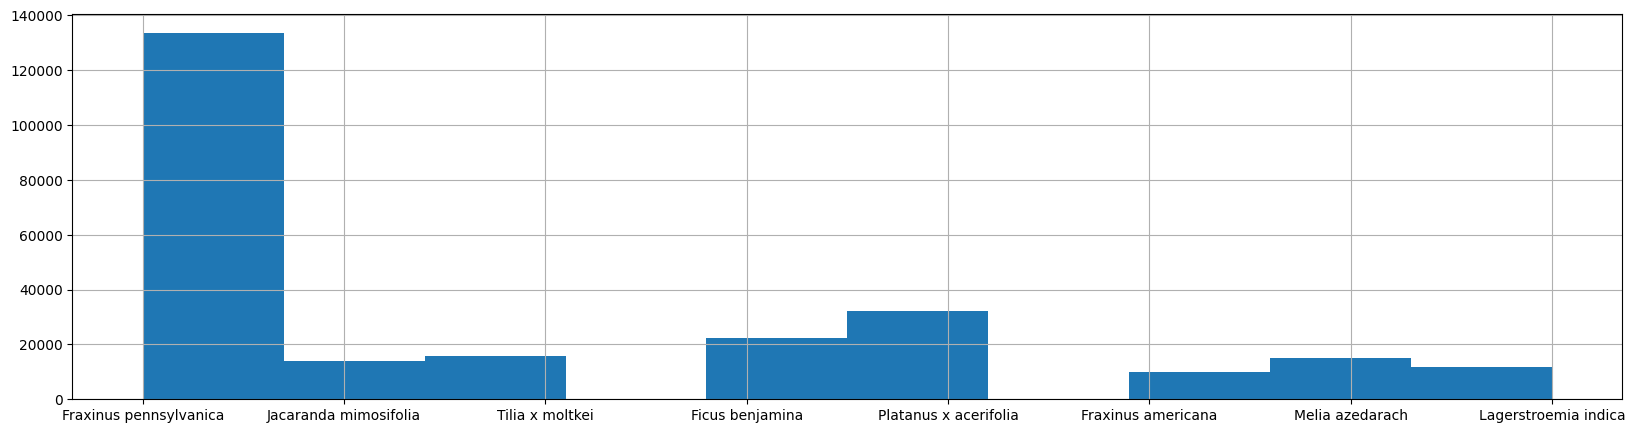

In [18]:
nombres_cientificos_graf= nombres_cientificos['nombre_cientifico']
nombres_cientificos_graf.hist(figsize=(20,5))
print(nombres_cientificos_graf)

/tmp/ipykernel_25245/3505263422.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab20', len(categorias))


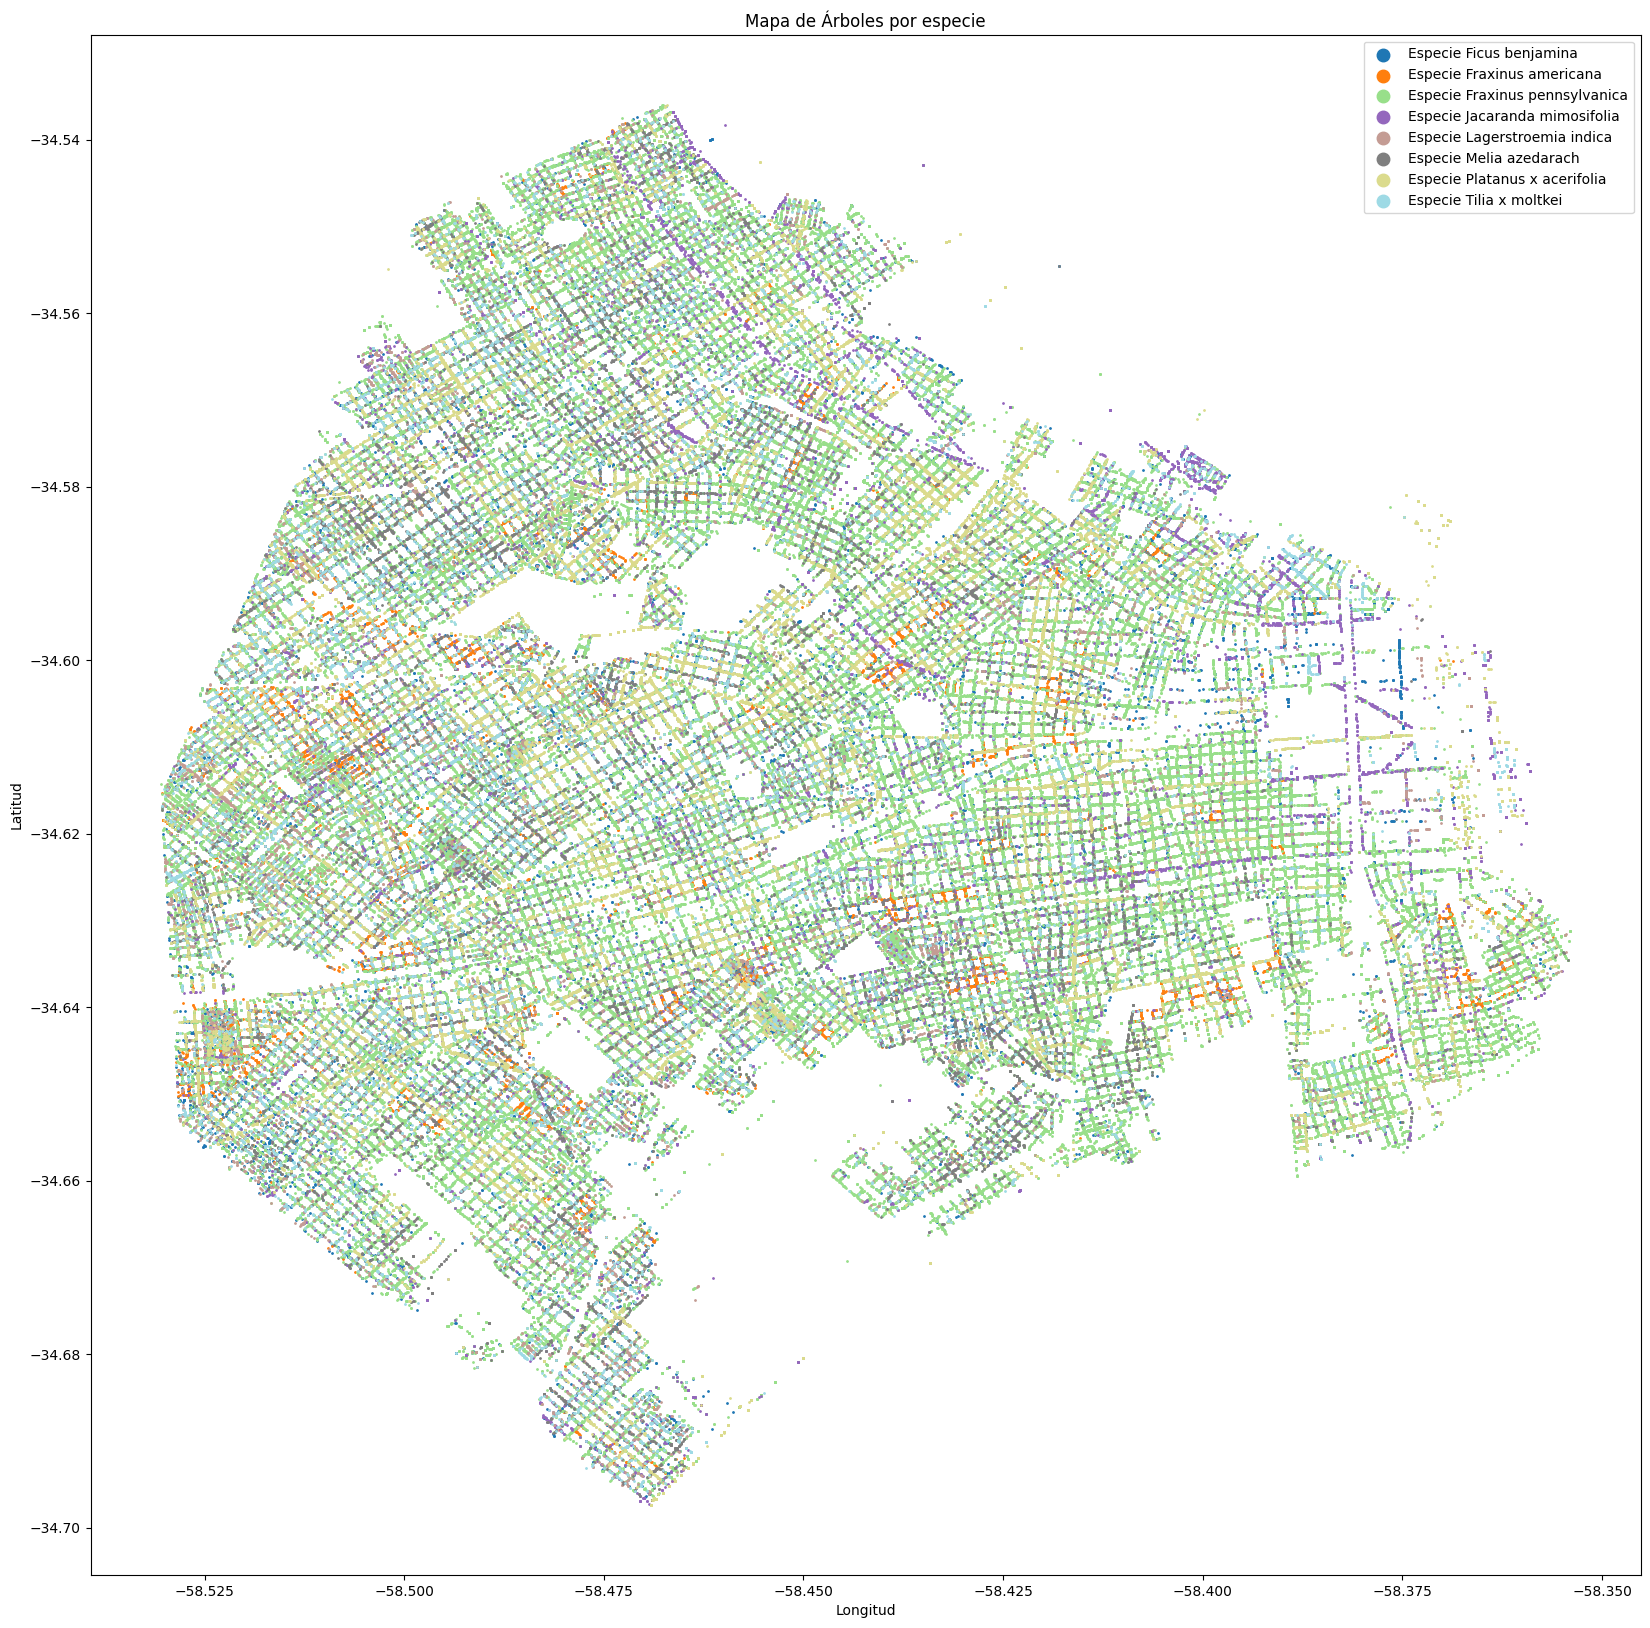

In [31]:
plt.figure(figsize=(20, 20))
categorias = sorted(nombres_cientificos_graf.unique())
colores = plt.cm.get_cmap('tab20', len(categorias))

for i, especie in enumerate(categorias):
    subset = datos_arbolado[datos_arbolado['nombre_cientifico'] == especie]
    plt.scatter(
        subset['long'],
        subset['lat'],
        s=1,
        color=colores(i),
        label=f'Especie {(especie)}'
    )

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mapa de Árboles por especie")
plt.legend(markerscale=9)
plt.show()

In [20]:
133609/370000

0.3611054054054054

## Ancho_acera

In [21]:
datos_arbolado['ancho_acera'].value_counts()


##plt.boxplot(datos_arbolado['ancho_acera'].notna())

ancho_acera
4.4     94936
3.2     74143
2.8     24276
3       18673
4       14768
        ...  
0.4         1
2.23        1
1.53        1
1.01        1
5.85        1
Name: count, Length: 431, dtype: int64

## Estado_plantera

In [22]:
datos_arbolado['estado_plantera'].value_counts()

estado_plantera
Ocupada                       330887
Sobreocupada                   38534
Subocupada                       532
Parcialmente cerrada              76
Ocupada                           67
Cerrada                           32
Cantero ocupado                   17
ocupada                           11
sobreocupada                       8
SobreOcupada                       7
Sobreocupada parc. cerrada         5
Vacía                              4
Name: count, dtype: int64

## Ubicacion_plantera


In [23]:
datos_arbolado['ubicacion_plantera'].value_counts()

ubicacion_plantera
Regular                   340432
Ochava                     21879
Fuera de línea              5941
regular                      201
Regular                      198
Ocupada                       40
Fuera Nivel                   36
Cantero Grande                13
O                             12
ochava                        10
Ochava/Fuera Línea             3
Och                            2
Sobreocupada                   2
o                              1
Fuera Línea,Ochava             1
Elevada                        1
Subocupada                     1
Ochva                          1
Fuera de Línea, Ochava         1
Fuera Línea/Ochava             1
Name: count, dtype: int64

## Nivel_plantera

In [24]:
datos_arbolado['nivel_plantera'].value_counts()

nivel_plantera
A nivel                            232099
Elevada                             78433
Bajo nivel                          35653
A Nivel                             21479
Bajo Nivel                            850
AN                                     88
A nivel                                61
a Nivel                                40
A  Nivel                               32
EL                                     21
Elevadas                               18
BN                                     12
Bajo Bivel                              9
Elevado                                 6
Eleveda                                 5
Reducida                                5
elevada                                 4
el                                      2
ELEVADA                                 2
bajo nivel                              2
Baja Nivel                              2
obs: no tiene plantera definida         1
Regular                                 1
Bajo  nivel        

## Diametro_altura_pecho

In [25]:
datos_arbolado['diametro_altura_pecho'].value_counts()

diametro_altura_pecho
25.0     10924
32.0      8968
22.0      8772
30.0      8751
20.0      8469
         ...  
193.0        1
171.0        1
199.0        1
151.0        1
162.0        1
Name: count, Length: 188, dtype: int64

In [26]:
datos_arbolado['diametro_altura_pecho'].describe()

count    369894.000000
mean         31.986864
std          21.267623
min           0.000000
25%          17.000000
50%          29.000000
75%          43.000000
max         199.000000
Name: diametro_altura_pecho, dtype: float64

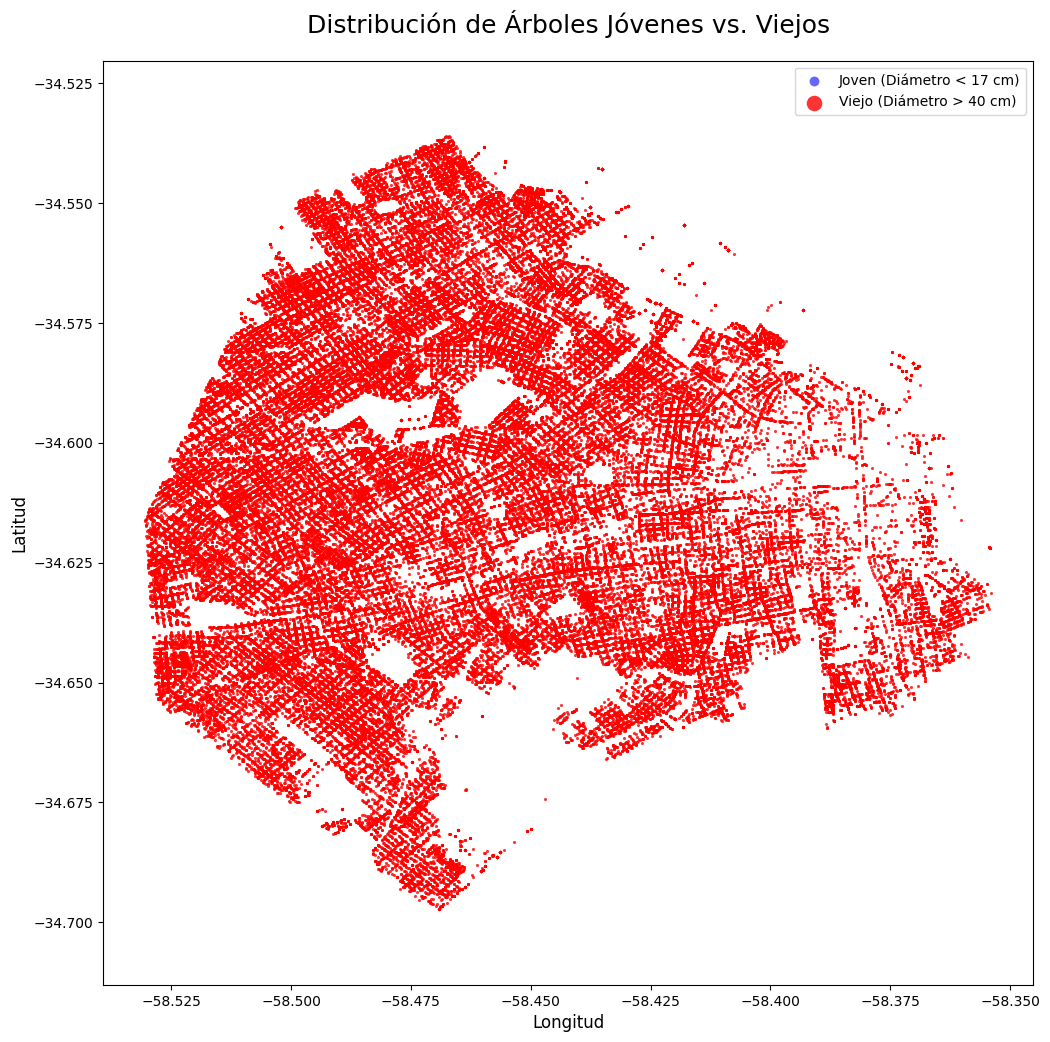

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumo que ya tenés el DataFrame limpio y cargado como 'df_clean'
# df_clean = ...

# --- LA PARTE MÁS IMPORTANTE ---
# 1. Filtramos y creamos dos DataFrames NUEVOS y separados.
#    Estos DataFrames NO contienen los árboles con diámetro entre 17 y 40.
arboles_jovenes = datos_arbolado[datos_arbolado['diametro_altura_pecho'] < 0]
arboles_viejos = datos_arbolado[datos_arbolado['diametro_altura_pecho'] > 40]

# ---------------------------------

# 2. Preparar la figura con fondo blanco
plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.set_facecolor('white')

# 3. Dibujar SOLAMENTE el DataFrame de los jóvenes
ax.scatter(
    arboles_jovenes['long'],
    arboles_jovenes['lat'],
    s=2,
    color='blue',
    label='Joven (Diámetro < 17 cm)',
    alpha=0.6,
    linewidths=0
)

# 4. Dibujar SOLAMENTE el DataFrame de los viejos
ax.scatter(
    arboles_viejos['long'],
    arboles_viejos['lat'],
    s=5,
    color='red',
    label='Viejo (Diámetro > 40 cm)',
    alpha=0.8,
    linewidths=0
)

# 5. Configurar el resto del gráfico
ax.set_title('Distribución de Árboles Jóvenes vs. Viejos', fontsize=18, color='black', pad=20)
ax.set_xlabel('Longitud', fontsize=12, color='black')
ax.set_ylabel('Latitud', fontsize=12, color='black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.axis('equal')
ax.legend(markerscale=5)

plt.show()

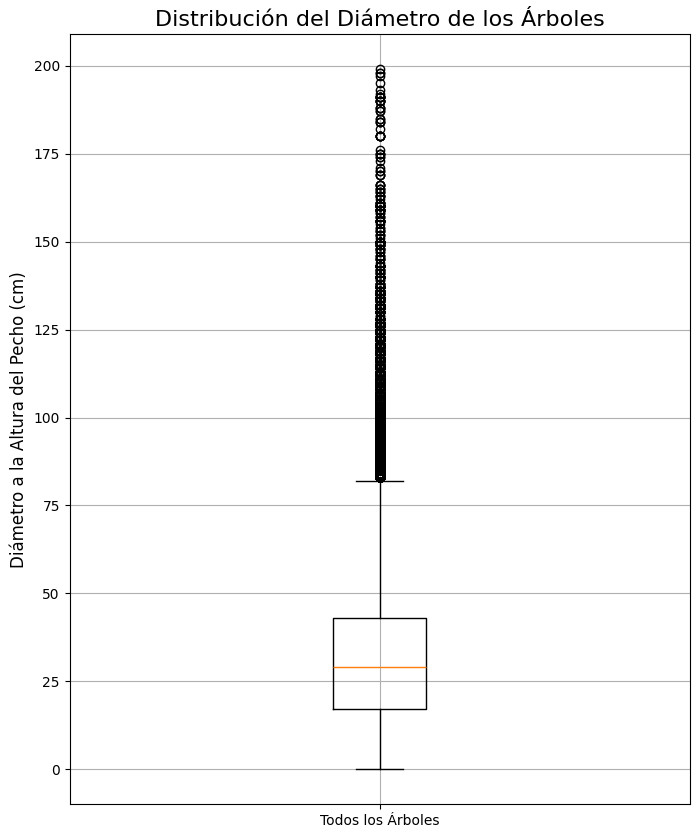

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumo que ya tenés el DataFrame limpio y cargado como 'df_clean'
# df_clean = ...

# Filtramos valores extremos para que el gráfico sea legible
df_filtrado = datos_arbolado[datos_arbolado['diametro_altura_pecho'] < 200]

# Preparamos la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 10))

# La función boxplot de matplotlib recibe directamente la serie de datos
# Es importante usar .dropna() para eliminar valores nulos que pueden dar error
ax.boxplot(df_filtrado['diametro_altura_pecho'].dropna())

# Configuramos el gráfico
ax.set_title('Distribución del Diámetro de los Árboles', fontsize=16)
ax.set_ylabel('Diámetro a la Altura del Pecho (cm)', fontsize=12)
ax.set_xticklabels(['Todos los Árboles']) # Le ponemos nombre al eje X
ax.grid(True) # Añadimos una grilla

plt.show()

## Altura_arbol

In [29]:
datos_arbolado['altura_arbol'].value_counts()

altura_arbol
8.0     35071
9.0     34295
7.0     32517
10.0    30200
6.0     27123
12.0    23912
4.0     23125
3.0     22582
5.0     22244
2.0     21921
11.0    20994
13.0    15027
14.0    12205
15.0    10955
16.0     7484
17.0     4911
18.0     4911
20.0     3357
19.0     2675
22.0     2063
21.0     1740
24.0     1346
25.0     1321
23.0     1266
26.0      611
27.0      600
28.0      460
30.0      308
29.0      205
32.0       99
31.0       91
33.0       44
35.0       41
36.0       40
40.0       36
34.0       35
38.0       24
39.0       11
37.0        6
1.0         2
Name: count, dtype: int64

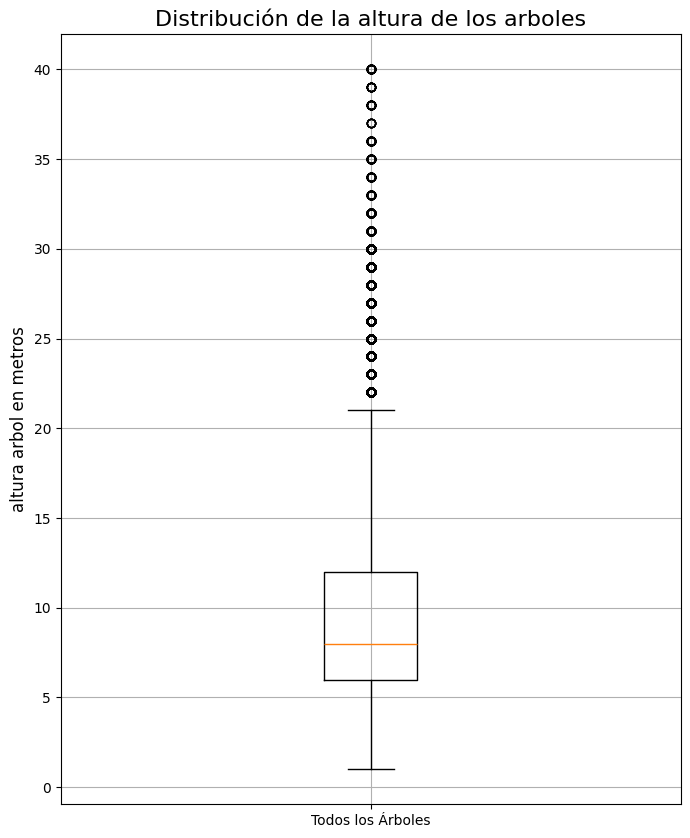

In [30]:
# Preparamos la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 10))


# La función boxplot de matplotlib recibe directamente la serie de datos
# Es importante usar .dropna() para eliminar valores nulos que pueden dar error
ax.boxplot(datos_arbolado['altura_arbol'].dropna())

# Configuramos el gráfico
ax.set_title('Distribución de la altura de los arboles', fontsize=16)
ax.set_ylabel('altura arbol en metros', fontsize=12)
ax.set_xticklabels(['Todos los Árboles']) # Le ponemos nombre al eje X
ax.grid(True) # Añadimos una grilla

plt.show()